In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

/home/pedro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

X_train = np.vstack(X_train["Skeleton_Features"].values)

(700, 2)
(700,)


Train shape: (490, 132), Test shape: (210, 132)


Best CV macro-F1: 0.9815
Best params: {'clf__alpha': 1e-05, 'clf__batch_size': 32, 'clf__hidden_layer_sizes': (128, 64), 'clf__learning_rate_init': 0.001}
Test macro-F1: 0.9960
              precision    recall  f1-score   support

         0.0      0.988     1.000     0.994        84
         1.0      1.000     0.988     0.994        84
         2.0      1.000     1.000     1.000        42

    accuracy                          0.995       210
   macro avg      0.996     0.996     0.996       210
weighted avg      0.995     0.995     0.995       210



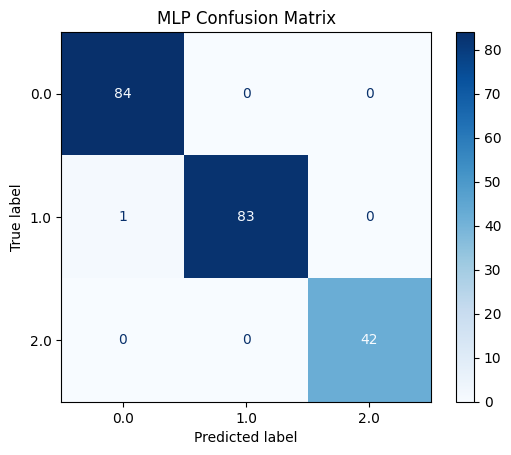

In [3]:
X_train_1, X_test, Y_train_1, Y_test = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train
)

print(f"Train shape: {X_train_1.shape}, Test shape: {X_test.shape}")

mlp_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(
        activation='relu',
        solver='adam',
        early_stopping=True,
        n_iter_no_change=10,
        max_iter=400,
        random_state=42,
        verbose=False
    ))
])

param_grid = {
    'clf__hidden_layer_sizes': [(64,), (128,), (64,32), (128,64)],
    'clf__alpha': [1e-5, 1e-4, 1e-3],
    'clf__learning_rate_init': [1e-3, 3e-3, 1e-2],
    'clf__batch_size': [32, 64, 128]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=mlp_pipe,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs.fit(X_train, Y_train)

print(f"Best CV macro-F1: {gs.best_score_:.4f}")
print("Best params:", gs.best_params_)

y_pred = gs.predict(X_test)
test_f1 = f1_score(Y_test, y_pred, average='macro')
print(f"Test macro-F1: {test_f1:.4f}")
print(classification_report(Y_test, y_pred, digits=3))

classes = np.unique(Y_test)
cm = confusion_matrix(Y_test, y_pred, labels=classes)
ConfusionMatrixDisplay(cm, display_labels=classes).plot(cmap="Blues", values_format="d")
plt.title("MLP Confusion Matrix")
plt.show()